# Visualización de distribuciones a través de histogramas y boxplots

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cargar el CSV
df = pd.read_csv("full_music_table.csv")

# Ver las primeras filas
df.head()


,track_id,track_name_clean,artists_name_clean,artist_count,released_year,released_month,released_day,release_date,streams,in_spotify_playlists,...,bpm,key,mode,danceability_pct,valence_pct,energy_pct,acousticness_pct,instrumentalness_pct,liveness_pct,speechiness_pct
0,6909746,white christmas,"bing crosby, john scott trotter & his orchestr...",3,1942,1,1,1942-01-01,395591396,11940,...,96,A,Major,23,19,25,91,0,40,3
1,3087104,the christmas song (merry christmas to you) - ...,nat king cole,1,1946,11,1,1946-11-01,389771964,11500,...,139,C#,Major,36,22,15,84,0,11,4
2,8753775,let it snow! let it snow! let it snow!,"frank sinatra, b. swanson quartet",2,1950,1,1,1950-01-01,473248298,10585,...,143,D,Major,60,86,32,88,0,34,6
3,4002890,a holly jolly christmas - single version,burl ives,1,1952,1,1,1952-01-01,395591396,7930,...,140,Sin info,Major,67,81,36,64,0,15,3
4,6372609,jingle bell rock,bobby helms,1,1957,1,1,1957-01-01,741301563,10326,...,119,D,Major,74,78,37,84,0,6,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_id              951 non-null    object
 1   track_name_clean      951 non-null    object
 2   artists_name_clean    951 non-null    object
 3   artist_count          951 non-null    int64 
 4   released_year         951 non-null    int64 
 5   released_month        951 non-null    int64 
 6   released_day          951 non-null    int64 
 7   release_date          951 non-null    object
 8   streams               951 non-null    int64 
 9   in_spotify_playlists  951 non-null    int64 
 10  in_apple_playlists    951 non-null    int64 
 11  in_deezer_playlists   951 non-null    int64 
 12  total_playlists       951 non-null    int64 
 13  in_spotify_charts     951 non-null    int64 
 14  in_apple_charts       951 non-null    int64 
 15  in_deezer_charts      951 non-null    in

In [14]:
# Crear columna de Década (como lo hice en Looker Studio)
df["decada"] = (df["released_year"] // 10) * 10
df["decada"] = df["decada"].astype(str) + "s"

# Ver resultado
print(df[["released_year", "decada"]].head())

   released_year decada
0           1942  1940s
1           1946  1940s
2           1950  1950s
3           1952  1950s
4           1957  1950s


**Streams por década**

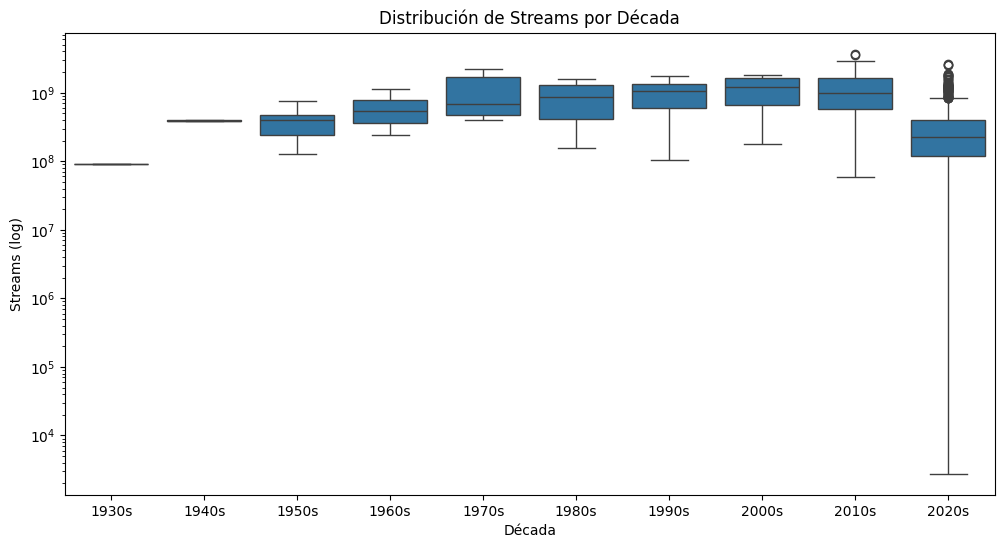

In [15]:
orden_decadas = ["1930s","1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]
df_filtrado = df[df["streams"] != -1]

plt.figure(figsize=(12,6))
sns.boxplot(x="decada", y="streams", data=df_filtrado, order=orden_decadas)

plt.yscale("log")  # 👈 escala logarítmica en el eje Y
plt.title("Distribución de Streams por Década")
plt.xlabel("Década")
plt.ylabel("Streams (log)")
plt.show()

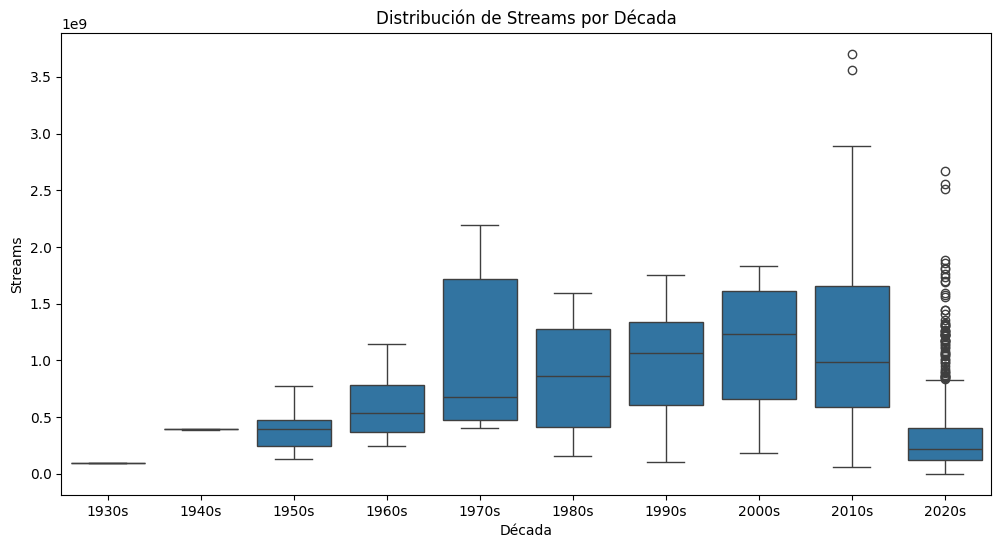

In [16]:
orden_decadas = ["1930s","1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]

plt.figure(figsize=(12,6))
sns.boxplot(x="decada", y="streams", data=df_filtrado, order=orden_decadas)

plt.title("Distribución de Streams por Década")
plt.xlabel("Década")
plt.ylabel("Streams")
plt.show()

**Danceability por tonalidad**

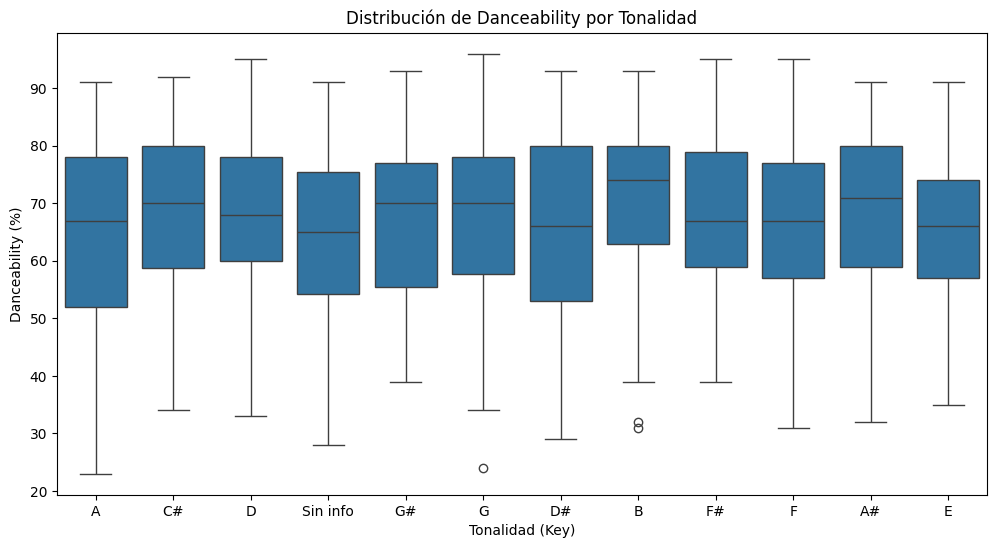

In [17]:
# Tamaño de la figura
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(x="key", y="danceability_pct", data=df)

# Títulos y etiquetas
plt.title("Distribución de Danceability por Tonalidad")
plt.xlabel("Tonalidad (Key)")
plt.ylabel("Danceability (%)")

# Mostrar el gráfico
plt.show()



**Histogramas de mis métricas porcentuales**

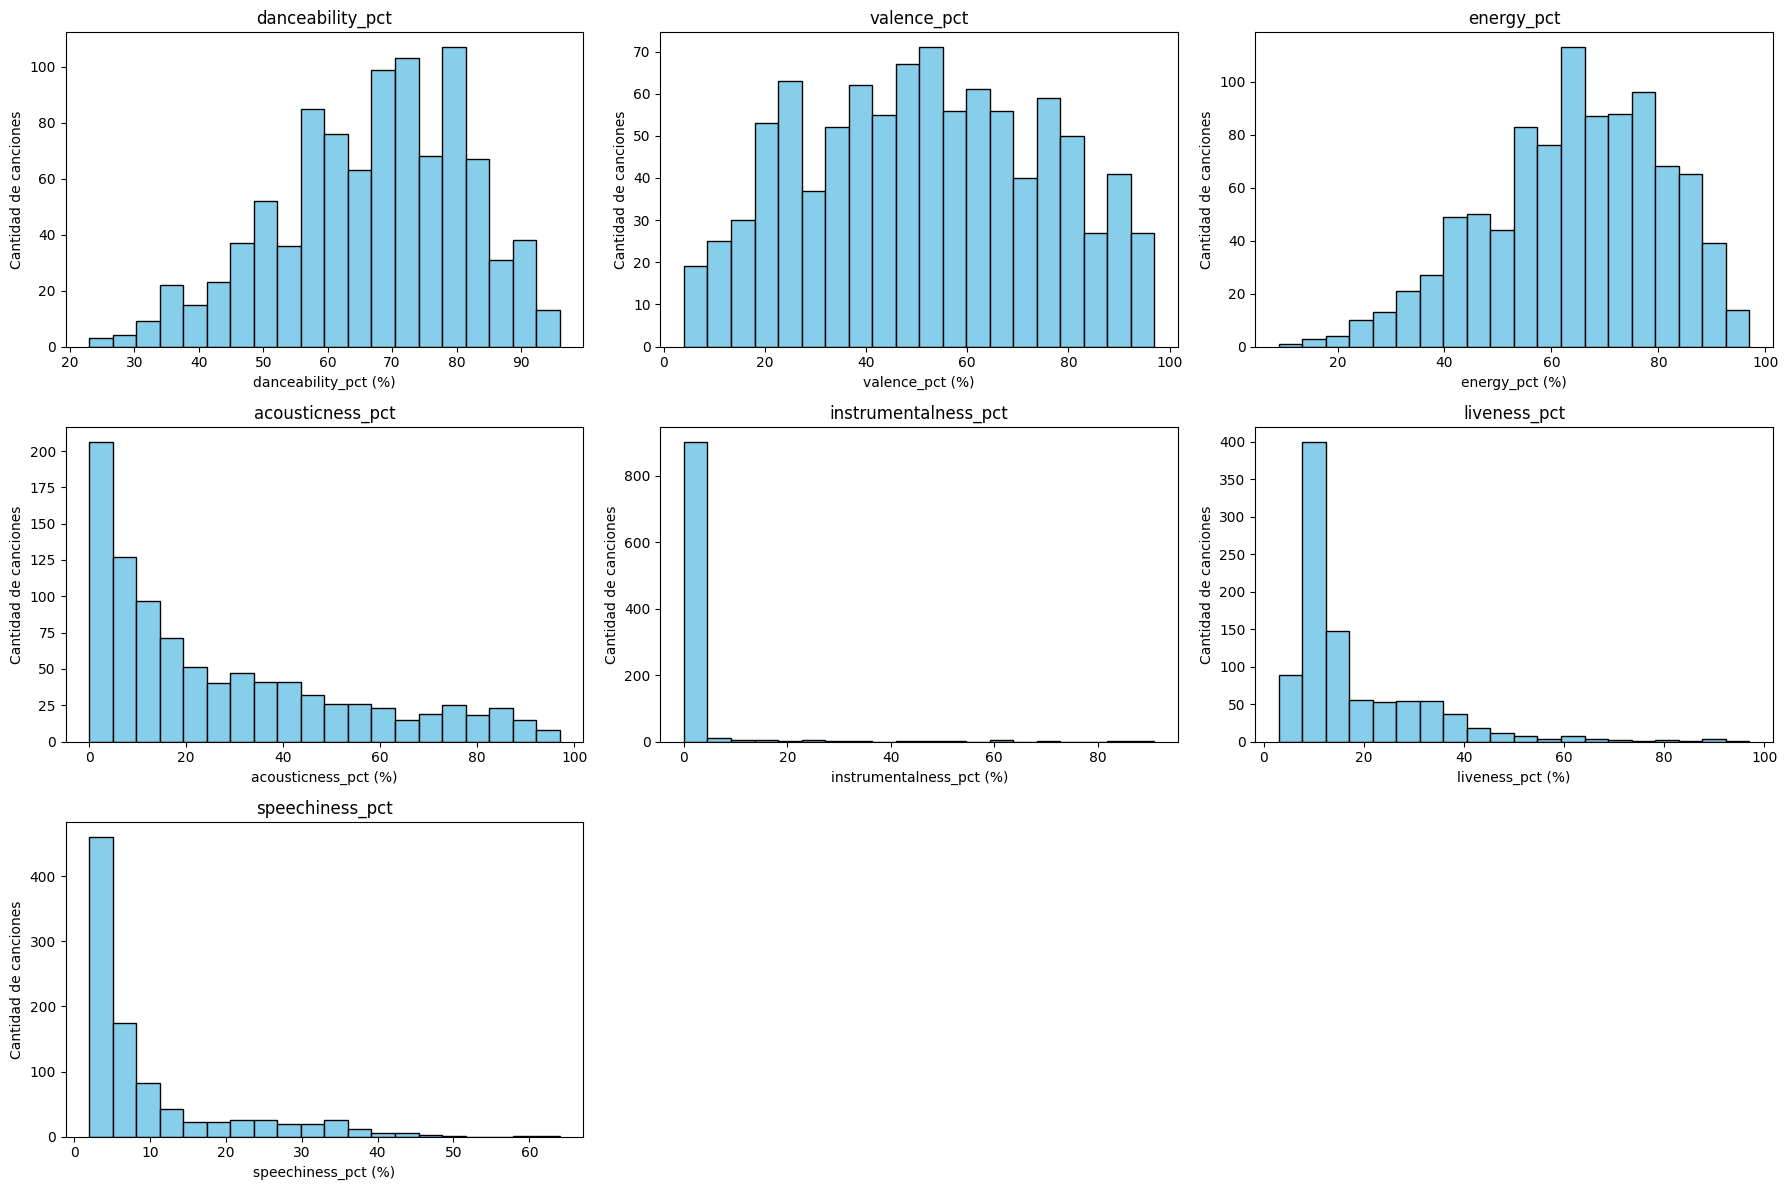

In [18]:
# Lista de métricas porcentuales
metrics_pct = ["danceability_pct", "valence_pct", "energy_pct",
               "acousticness_pct", "instrumentalness_pct",
               "liveness_pct", "speechiness_pct"]

# Configurar figura con subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,12))  # 3x3, sobra un espacio
axes = axes.flatten()  # para iterar fácilmente

# Crear un histograma por métrica
for i, metric in enumerate(metrics_pct):
    axes[i].hist(df[metric], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(f"{metric}")
    axes[i].set_xlabel(f"{metric} (%)")
    axes[i].set_ylabel("Cantidad de canciones")

# Ocultar cualquier subplot vacío
for j in range(len(metrics_pct), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Otros

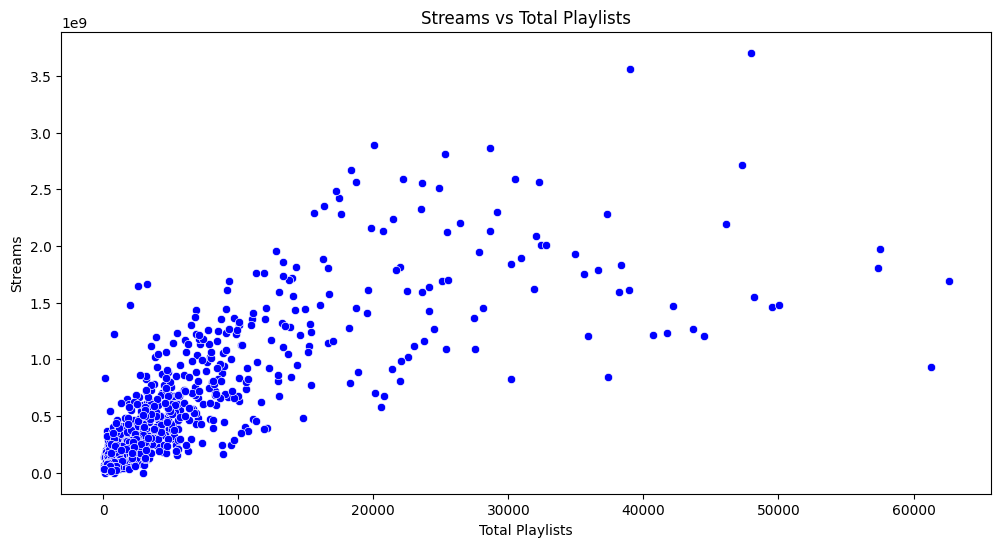

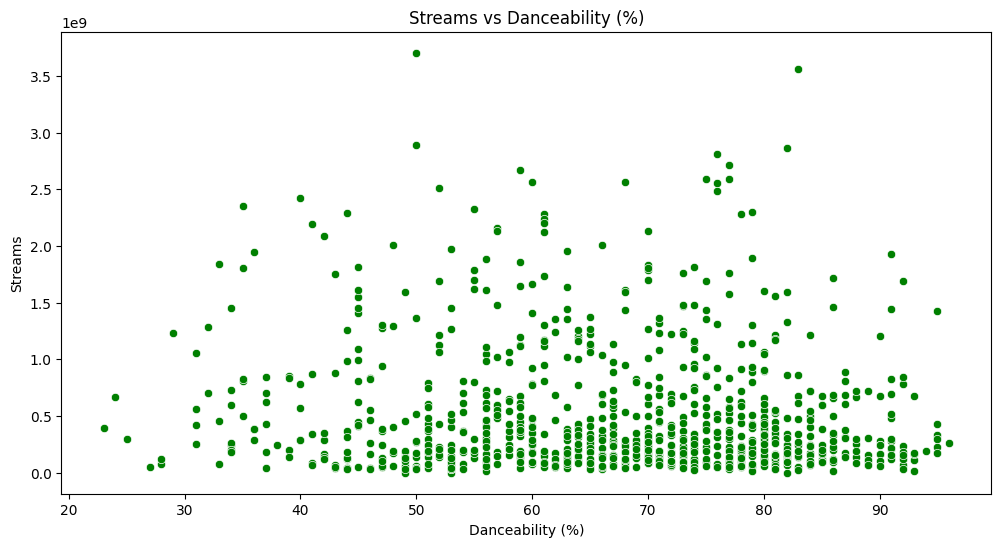

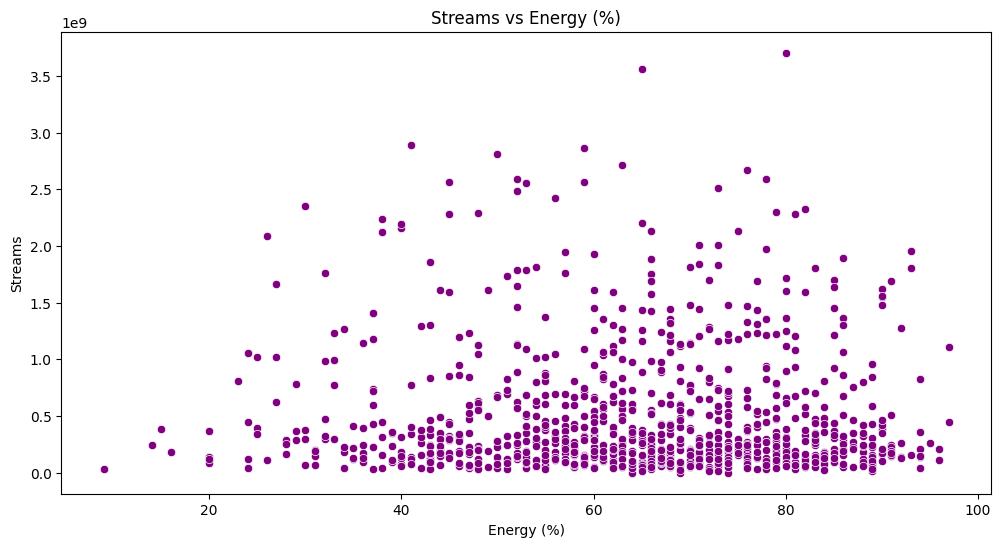

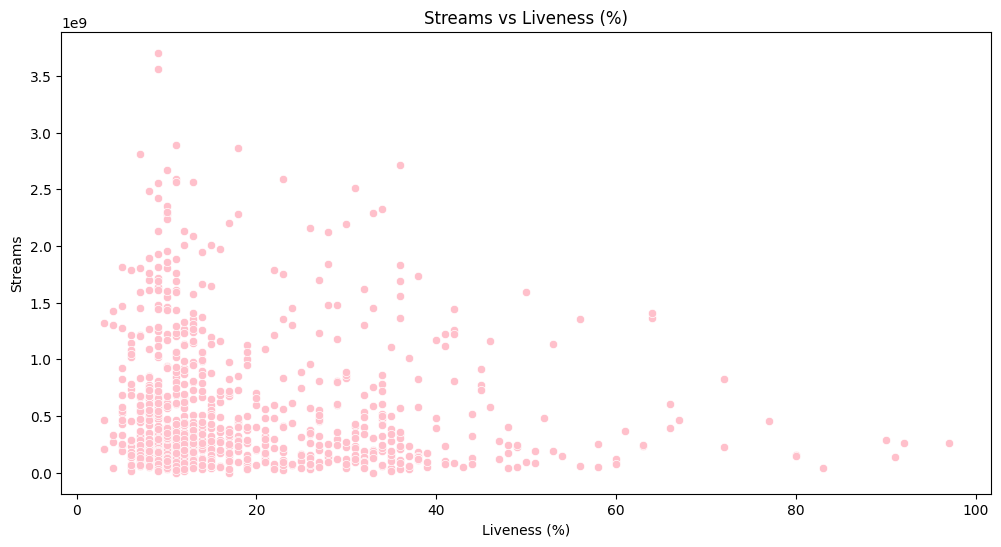

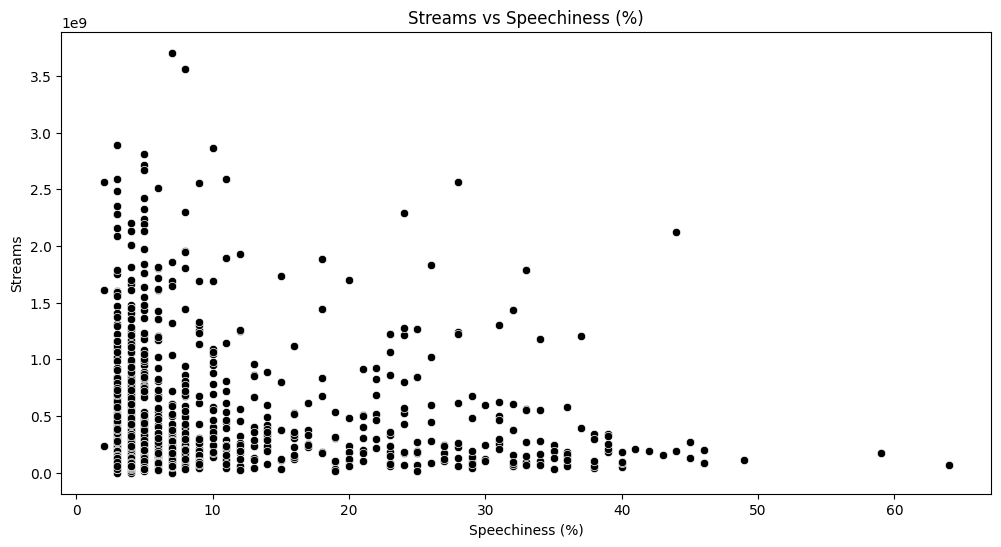

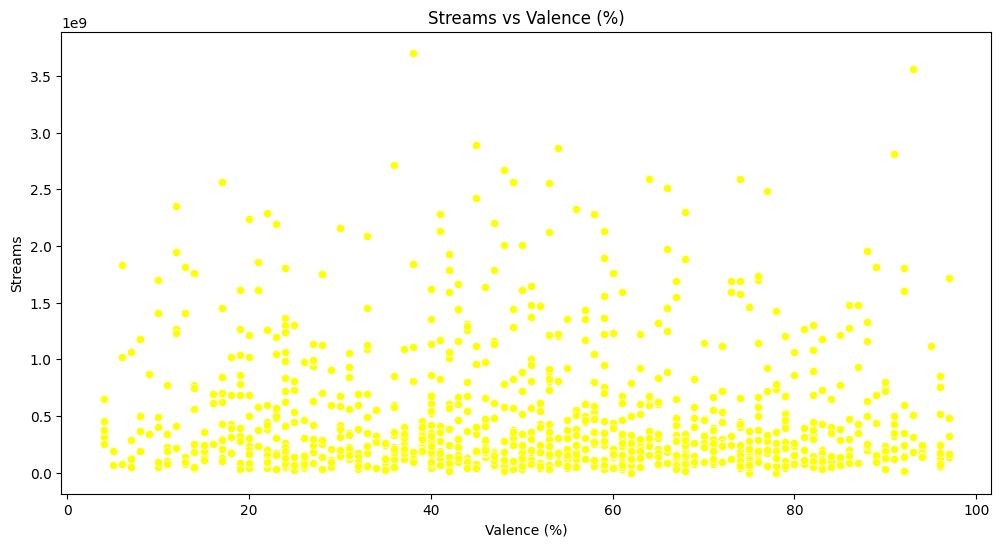

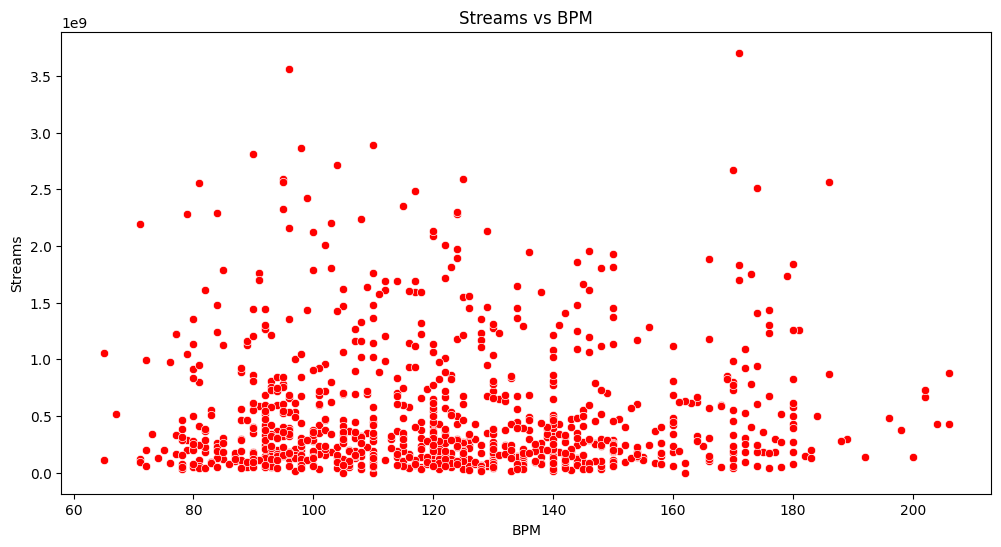

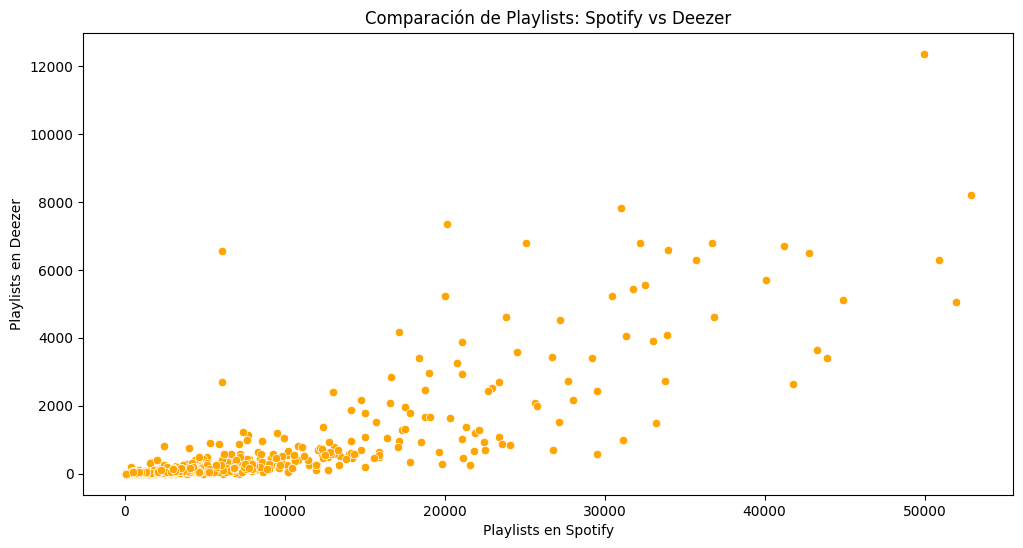

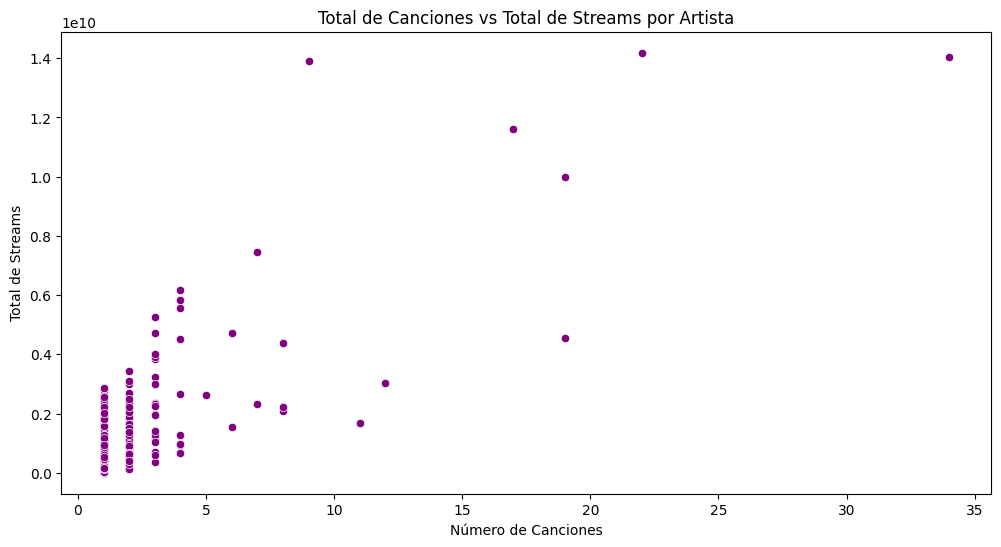

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1️⃣ Streams vs Total Playlists
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="total_playlists", y="streams", data=df, color="blue")
plt.title("Streams vs Total Playlists")
plt.xlabel("Total Playlists")
plt.ylabel("Streams")
plt.show()

# ------------------------------
# 2️⃣ Streams vs Danceability
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="danceability_pct", y="streams", data=df, color="green")
plt.title("Streams vs Danceability (%)")
plt.xlabel("Danceability (%)")
plt.ylabel("Streams")
plt.show()

# ------------------------------
# 2️⃣ Streams vs Energy
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="energy_pct", y="streams", data=df, color="purple")
plt.title("Streams vs Energy (%)")
plt.xlabel("Energy (%)")
plt.ylabel("Streams")
plt.show()

# ------------------------------
# 2️⃣ Streams vs Liveness
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="liveness_pct", y="streams", data=df, color="pink")
plt.title("Streams vs Liveness (%)")
plt.xlabel("Liveness (%)")
plt.ylabel("Streams")
plt.show()

# ------------------------------
# 2️⃣ Streams vs Speechiness
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="speechiness_pct", y="streams", data=df, color="black")
plt.title("Streams vs Speechiness (%)")
plt.xlabel("Speechiness (%)")
plt.ylabel("Streams")
plt.show()

# ------------------------------
# 2️⃣ Streams vs Valence
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="valence_pct", y="streams", data=df, color="yellow")
plt.title("Streams vs Valence (%)")
plt.xlabel("Valence (%)")
plt.ylabel("Streams")
plt.show()


# ------------------------------
# 3️⃣ Streams vs BPM
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="bpm", y="streams", data=df, color="red")
plt.title("Streams vs BPM")
plt.xlabel("BPM")
plt.ylabel("Streams")
plt.show()

# ------------------------------
# 4️⃣ Spotify Playlists vs Deezer Playlists
# ------------------------------
plt.figure(figsize=(12,6))
sns.scatterplot(x="in_spotify_playlists", y="in_deezer_playlists", data=df, color="orange")
plt.title("Comparación de Playlists: Spotify vs Deezer")
plt.xlabel("Playlists en Spotify")
plt.ylabel("Playlists en Deezer")
plt.show()

# ------------------------------
# 5️⃣ Total Songs vs Total Streams por Artista
# ------------------------------
# Primero agregamos por artista
artist_df = df.groupby("artists_name_clean").agg(
    total_songs=("track_id", "count"),
    total_streams=("streams", "sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(x="total_songs", y="total_streams", data=artist_df, color="purple")
plt.title("Total de Canciones vs Total de Streams por Artista")
plt.xlabel("Número de Canciones")
plt.ylabel("Total de Streams")
plt.show()
